In [24]:
from pathlib import Path
from argparse import ArgumentParser

from rbclib import RBCPath
from pathlib import Path
import pandas as pd
import numpy as np

In [25]:
current_data = pd.read_csv('./derivatives/features.csv')

In [26]:
current_data.columns

Index(['bankssts', 'caudalanteriorcingulate', 'caudalmiddlefrontal', 'cuneus',
       'entorhinal', 'frontalpole', 'fusiform', 'inferiorparietal',
       'inferiortemporal', 'insula', 'isthmuscingulate', 'lateraloccipital',
       'lateralorbitofrontal', 'lingual', 'medialorbitofrontal',
       'middletemporal', 'paracentral', 'parahippocampal', 'parsopercularis',
       'parsorbitalis', 'parstriangularis', 'pericalcarine', 'postcentral',
       'posteriorcingulate', 'precentral', 'precuneus',
       'rostralanteriorcingulate', 'rostralmiddlefrontal', 'superiorfrontal',
       'superiorparietal', 'superiortemporal', 'supramarginal', 'temporalpole',
       'transversetemporal', 'subject_id', 'study', 'study_site', 'session_id',
       'wave', 'age', 'sex', 'race', 'ethnicity', 'bmi', 'handedness',
       'participant_education', 'p_factor',
       'internalizing_mcelroy_harmonized_all_samples',
       'externalizing_mcelroy_harmonized_all_samples',
       'attention_mcelroy_harmonized_a

### Train the linear regression

In [27]:
# create train data, test data

p_factor_loaded = current_data[~np.isnan(current_data['p_factor'])]

three_quarter_length = int(len(p_factor_loaded) / 4) * 3

train_data = p_factor_loaded.iloc[:three_quarter_length]
test_data = p_factor_loaded.iloc[three_quarter_length:]

In [28]:
train_data

,bankssts,caudalanteriorcingulate,caudalmiddlefrontal,cuneus,entorhinal,frontalpole,fusiform,inferiorparietal,inferiortemporal,insula,...,handedness,participant_education,p_factor,internalizing_mcelroy_harmonized_all_samples,externalizing_mcelroy_harmonized_all_samples,attention_mcelroy_harmonized_all_samples,cubids_acquisition_group,is_train,parent_1_education_num,parent_2_education_num
0,2636.0,2001.0,6526.5,4226.0,2625.5,1433.0,9963.5,16145.0,11816.5,7008.5,...,Right,9th Grade,0.589907,-0.449373,-0.630780,-1.842178,1,True,1.0,2.0
1,2561.0,1496.5,5812.0,3069.0,1506.0,1046.0,9044.5,13748.5,10105.5,8036.0,...,Right,11th Grade,-0.659061,0.531072,0.392751,0.190706,1,True,3.0,3.0
2,2882.5,2223.5,6976.0,3144.0,2025.0,1154.0,11627.5,18001.0,11854.5,6900.0,...,Right,6th Grade,-1.608375,-0.744118,-0.314187,-0.432662,1,True,3.0,1.0
3,2693.5,2562.5,7174.0,2990.0,1605.0,1165.0,9760.0,17688.5,11815.0,7966.5,...,Right,9th Grade,-1.233807,-0.896835,-0.449099,0.111167,1,True,3.0,3.0
4,2249.5,2174.0,6677.5,3127.0,1808.5,1100.5,8087.5,11503.0,10526.5,7517.0,...,Right,11th Grade,-0.923100,-0.313455,2.204168,-0.782266,1,True,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,2605.5,1835.5,7408.5,3472.0,1401.5,1414.0,9766.0,13807.5,10682.0,7809.0,...,Left,4th Grade,1.102020,1.338947,-1.742454,1.202524,1,True,1.0,1.0
791,2912.5,2195.5,8559.0,3409.5,1771.5,1215.0,9272.5,17604.0,12067.5,7264.5,...,Right,7th Grade,-0.487128,-1.254194,0.761510,-1.048631,2,True,2.0,1.0
792,2862.0,2464.5,9136.5,3214.5,1947.5,1321.5,10006.0,15482.5,12797.0,7987.5,...,Right,10th Grade,0.709032,-0.116449,-0.564224,-1.729342,1,True,3.0,3.0
793,2564.5,1865.5,6256.5,2559.5,1894.5,1080.0,9272.0,14586.5,11868.5,7487.0,...,Right,12th Grade,0.919035,1.050311,0.626598,-0.332775,9,True,1.0,1.0


In [29]:
# Import the LinearRegression type:
from sklearn.linear_model import LinearRegression

# LinearRegression requires a matrix whose columns are the variables and whose
# final column is the value being predicted (the p_factor for us). We can
# extract these columns straight from the dataframes we generated.
# train_matrix = train_vars.loc[:, ['ba1_surface_area', 'p_factor']].values



train_matrix = train_data.loc[:, ['insula','p_factor']].values
train_okrows = np.all(~np.isnan(train_matrix), axis=1)
train_matrix = train_matrix[train_okrows]


# We need to exclude rows with NaNs for training:
# train_okrows = np.all(~np.isnan(train_matrix), axis=1)
# train_matrix = train_matrix[train_okrows]

# Train the regression using the training matrix:
lreg = LinearRegression()
lreg.fit(train_matrix[:, :1], train_matrix[:, 1])

# Display the trained regression parameters:
print("Linear Regression:")
print("  Intercept:", lreg.intercept_)
print("  Slope:", lreg.coef_)

Linear Regression:
  Intercept: 0.2727740641866453
  Slope: [-9.48150863e-05]


In [30]:
# We can apply the trained linear regression object `lreg` to the 1-column
# matrix of ba1_surface_area values in the test_vars dataframe.
test_matrix = test_data.loc[:, ['insula']].values
test_okrows = np.all(~np.isnan(test_matrix), axis=1)
test_matrix = test_matrix[test_okrows]

# Apply the model:
p_factor_predictions = lreg.predict(test_matrix)

# Display the predictions:
p_factor_predictions

array([-0.32166912, -0.3856693 , -0.44469169, -0.3315773 , -0.36215516,
       -0.45934062, -0.45066504, -0.48366069, -0.47688142, -0.37239519,
       -0.50475705, -0.55813794, -0.4830918 , -0.36348257, -0.59265064,
       -0.43682204, -0.43862353, -0.21490733, -0.51641931, -0.56022388,
       -0.44639837, -0.56434833, -0.5421616 , -0.44383836, -0.51689338,
       -0.47593326, -0.4654562 , -0.28777273, -0.49821481, -0.45597469,
       -0.52182377, -0.6885561 , -0.46327545, -0.35224698, -0.51148892,
       -0.40226194, -0.39941749, -0.28203641, -0.39742637, -0.50708002,
       -0.57141206, -0.38633301, -0.38410485, -0.52191858, -0.3875182 ,
       -0.44303243, -0.31678614, -0.41601013, -0.39140562, -0.45151838,
       -0.44047242, -0.42056125, -0.3831567 , -0.43876575, -0.5126267 ,
       -0.47621771, -0.49006071, -0.51490227, -0.40809307, -0.37358038,
       -0.50205482, -0.57126983, -0.36850777, -0.46645176, -0.47138214,
       -0.5534446 , -0.37960114, -0.35400106, -0.2869668 , -0.43

In [34]:
test_data['p_factor_pred'] = np.nan
test_data.loc[test_okrows, 'p_factor_pred'] = p_factor_predictions

# Display the resulting test data:
test_data

/tmp/ipykernel_259/3880344108.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['p_factor_pred'] = np.nan


,bankssts,caudalanteriorcingulate,caudalmiddlefrontal,cuneus,entorhinal,frontalpole,fusiform,inferiorparietal,inferiortemporal,insula,...,participant_education,p_factor,internalizing_mcelroy_harmonized_all_samples,externalizing_mcelroy_harmonized_all_samples,attention_mcelroy_harmonized_all_samples,cubids_acquisition_group,is_train,parent_1_education_num,parent_2_education_num,p_factor_pred
795,2524.0,1784.0,5932.5,2338.0,1689.5,1556.0,9933.0,16263.5,13608.0,6269.5,...,7th Grade,0.297621,-1.701656,0.043779,-1.279851,1,True,2.0,2.0,-0.321669
796,2231.5,1534.0,6939.5,3539.0,1741.0,1208.5,9436.0,13750.5,12041.0,6944.5,...,11th Grade,1.460623,0.045431,-1.222593,0.092669,1,True,3.0,3.0,-0.385669
797,2972.0,2465.5,8460.0,3805.5,1846.0,1298.0,9863.0,16218.5,11380.0,7567.0,...,6th Grade,-0.749940,0.158442,2.447009,-0.885853,1,True,1.0,1.0,-0.444692
798,2333.0,2246.0,6532.0,2643.5,2846.0,1183.5,8992.0,12934.0,10114.0,6374.0,...,8th Grade,-0.295546,-0.841857,0.579829,-1.174415,1,True,1.0,2.0,-0.331577
799,1984.5,2082.5,5919.5,2110.0,1385.0,1306.0,8193.0,12277.0,9156.5,6696.5,...,6th Grade,0.220252,-0.915161,0.867641,-1.292799,2,True,2.0,2.0,-0.362155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055,2628.0,1897.5,5963.5,2687.5,2107.5,1179.5,10295.5,13912.0,11356.0,6775.5,...,9th Grade,-1.262053,1.508464,-0.436507,-0.599140,1,True,1.0,1.0,-0.369646
1056,2302.0,1533.5,5744.5,2859.5,1377.0,1142.0,7653.5,10841.5,8123.5,6573.0,...,12th Grade,-1.233807,-0.896835,-0.449099,0.111167,1,True,1.0,NaN,-0.350445
1057,2305.5,1926.0,7553.0,3667.0,2341.5,1449.0,9620.5,13554.0,12952.5,8232.0,...,3rd Grade,-0.872749,1.581768,-0.619987,0.556958,1,True,1.0,1.0,-0.507744
1058,3096.0,1907.5,7369.0,3993.5,2507.5,1167.5,10280.5,14553.0,12182.0,8050.5,...,Some College,-1.420477,0.750985,-0.377146,-0.519601,7,True,2.0,2.0,-0.490535


In [36]:
from sklearn.metrics import mean_squared_error

# Calculate MSE
mse = mean_squared_error(test_data['p_factor'], test_data['p_factor_pred'])
print(mse)

0.8242208914859518


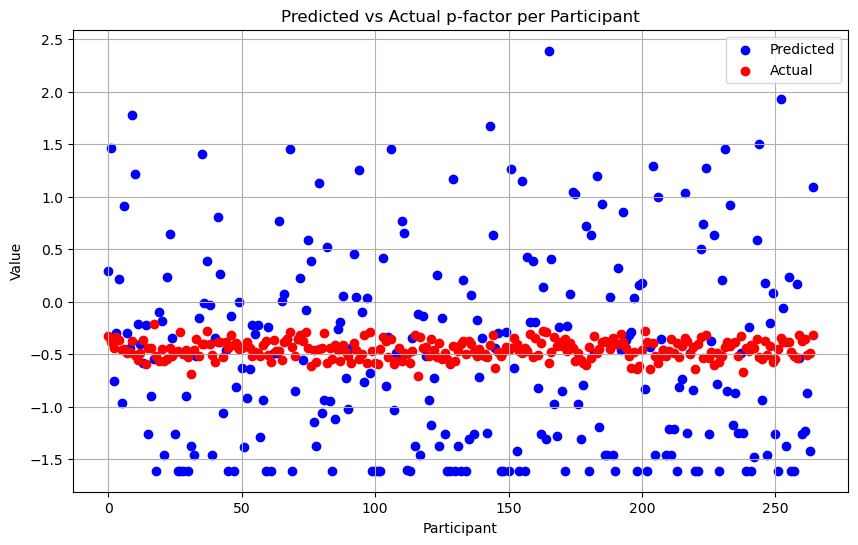

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Create participant index (e.g., 0, 1, 2, 3)
participants = range(len(test_data))

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(participants, test_data['p_factor'], color='blue', label='Predicted')
plt.scatter(participants, test_data['p_factor_pred'], color='red', label='Actual')

plt.xlabel('Participant')
plt.ylabel('Value')
plt.title('Predicted vs Actual p-factor per Participant')
plt.legend()
plt.grid(True)
# plt.xticks(participants)  # Optional: Show participant indices on x-axis
plt.show()
